# Weekly Assignment 1

#### Run imports to allow for data processing and print head from csv1

In [1]:
import seaborn as sns # to plot
import pandas as pd #data manipulation
import matplotlib.pyplot as plt # to customise the Seaborn graphs

#First Dataset
df1 = pd.read_csv('steps.csv',sep=";") #sep= allows for the ; delimited data to be read correctly
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#Second Dataset
df2 = pd.read_csv('survey.csv') #formated correctly so no sep= required.
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [3]:
df = pd.merge(df2, df1, on = 'id') #'id' is the common identifier allowing us to merge the datasets
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Below is important for organising the data into useable format.

In [4]:
df_date_mean = df1.transpose() #Transpose data

df_date_mean["Mean"] = df_date_mean.mean(axis=1, skipna=True, numeric_only=True) #This sets the mean for each date

df_date_mean["Date"] = df_date_mean.index #This adds the Date as the index

df_date_mean = df_date_mean.drop('id') #Drops the ID column

df_date_mean["Date"] = pd.to_datetime(df_date_mean["Date"]) #Format as datetime

print(df_date_mean)

                0        1        2   3   4        5   6   7       8   9  ...  \
20-6-2013     NaN      NaN      NaN NaN NaN      NaN NaN NaN     NaN NaN  ...   
21-6-2013     NaN      NaN  11428.0 NaN NaN  16924.0 NaN NaN     NaN NaN  ...   
22-6-2013     NaN  10473.0  12523.0 NaN NaN  14411.0 NaN NaN     NaN NaN  ...   
23-6-2013     NaN    705.0   2553.0 NaN NaN   5121.0 NaN NaN     NaN NaN  ...   
24-6-2013  3941.0   4287.0    190.0 NaN NaN  29784.0 NaN NaN     NaN NaN  ...   
...           ...      ...      ...  ..  ..      ...  ..  ..     ...  ..  ...   
9-5-2014      NaN      NaN   6227.0 NaN NaN      NaN NaN NaN  3996.0 NaN  ...   
10-5-2014     NaN      NaN   4567.0 NaN NaN      NaN NaN NaN  2556.0 NaN  ...   
11-5-2014     NaN      NaN   2567.0 NaN NaN      NaN NaN NaN   302.0 NaN  ...   
12-5-2014     NaN      NaN   1129.0 NaN NaN      NaN NaN NaN  2442.0 NaN  ...   
13-5-2014     NaN      NaN      NaN NaN NaN      NaN NaN NaN     NaN NaN  ...   

           921  922  923   

#### Now the data is clean we can graph it.

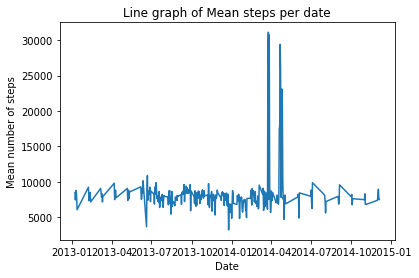

In [7]:
sns.lineplot(x="Date", y="Mean", data=df_date_mean)
plt.title('Line graph of Mean steps per date')
plt.xlabel("Date")
plt.ylabel("Mean number of steps")
plt.show()

#### The other chosen variables for analysis were weight and height. Defintitions were set up as a way of filtering unrealisitc outliers or input error when collecting the data.

In [9]:
#Weight
def over_200(x):
    if(x > 200.0):  #i.e. when weight is above 200
        return float('NaN') #return an error value
    else: #else its fine.
        return x
df['weight'] = df['weight'].apply(over_200) #.apply 'applies' the rule to the weight col.

def below_30(x):
    if(x < 30): #i.e. when weight is below 30
        return float('NaN') #return an error value
    else: #else its fine.
        return x
df['weight'] = df['weight'].apply(below_30) #.apply 'applies' the rule to the weight col.

# Height
def over_100(x): 
    if(x < 100): #Check
        return float('NaN') #Null value if unrealistic.
    else: 
        return x # Else its good.
df['height'] = df['height'].apply(over_100) #apply changes

#### Now to analyse the the mean and median of the distribution, we need ot process the data a little more.

#### First we do weight.

The median weight of respondents is: 71.0 kg
The mean weight of respondents is: 72.28463203463204 kg


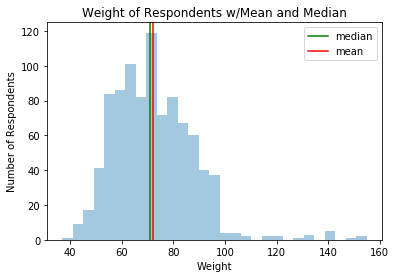

In [10]:
df_weight = df['weight'].dropna() #Remove null values

mean_weight = df['weight'].mean() #calc. mean
median_weight = df['weight'].median() #calc. median

print(f'The median weight of respondents is: {median_weight} kg') #print statement
print(f'The mean weight of respondents is: {mean_weight} kg') #print statement

sns.distplot(df_weight, kde=False) #Create plot.
plt.title('Weight of Respondents w/Mean and Median') #Title
plt.axvline(median_weight, 0, 100, color='green', label='median') #Add the median 
plt.axvline(mean_weight, 0, 100, color='red', label='mean') #Add the mean
plt.legend() #adds legend
plt.ylabel('Number of Respondents')
plt.xlabel('Weight')
plt.show()

#### In this scenario there is a clear positive skew, and this is confirmed by the fact that the mean is 'bigger' than the median (even if only slightly).

#### Now we do height.

The mean height of respondents is: 172.0cm
The mean height of respondents is: 171.7cm


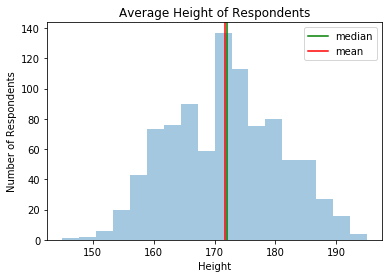

In [11]:
mean_height = df['height'].mean()
median_height = df['height'].median()

print("The mean height of respondents is: " + str(round(median_height,1)) + "cm") #print statement
print("The mean height of respondents is: " + str(round(mean_height,1)) + "cm") #print statement

height_size = df['height'].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.distplot(height_size, kde=False) 
plt.title('Average Height of Respondents')
plt.ylabel('Number of Respondents')
plt.xlabel('Height')
plt.axvline(median_height, 0, 100, color='green', label='median') #adds the median
plt.axvline(mean_height, 0, 100, color='red', label='mean') #adds the mean
plt.legend()
plt.show()

#### In this scenario there is a clear negative skew, and this is confirmed by the fact that the median is 'bigger' than the mean (even if only slightly).